In [1]:
# ワーニングメッセージを非表示にする
import warnings
warnings.simplefilter("ignore")

# データ分析によく使われるライブラリをインポートする
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Matplotlibを使っている際に、日本語のフォントを使うためのライブラリ
import japanize_matplotlib

# Jupyter NotebookでMatplotlibのグラフを表示するための設定
%matplotlib inline

# 機械学習モデルの作成に必要なライブラリをインポートする
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

# 以降のプログラムで使うための、各種ライブラリのインポートが完了した
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print('train shape',train.shape)
train.info()

train shape (27128, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27128 non-null  int64 
 1   age        27128 non-null  int64 
 2   job        27128 non-null  object
 3   marital    27128 non-null  object
 4   education  27128 non-null  object
 5   default    27128 non-null  object
 6   balance    27128 non-null  int64 
 7   housing    27128 non-null  object
 8   loan       27128 non-null  object
 9   contact    27128 non-null  object
 10  day        27128 non-null  int64 
 11  month      27128 non-null  object
 12  duration   27128 non-null  int64 
 13  campaign   27128 non-null  int64 
 14  pdays      27128 non-null  int64 
 15  previous   27128 non-null  int64 
 16  poutcome   27128 non-null  object
 17  y          27128 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.7+ MB


In [4]:
print('test shape', test.shape)
test.info()

test shape (18083, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18083 entries, 0 to 18082
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         18083 non-null  int64 
 1   age        18083 non-null  int64 
 2   job        18083 non-null  object
 3   marital    18083 non-null  object
 4   education  18083 non-null  object
 5   default    18083 non-null  object
 6   balance    18083 non-null  int64 
 7   housing    18083 non-null  object
 8   loan       18083 non-null  object
 9   contact    18083 non-null  object
 10  day        18083 non-null  int64 
 11  month      18083 non-null  object
 12  duration   18083 non-null  int64 
 13  campaign   18083 non-null  int64 
 14  pdays      18083 non-null  int64 
 15  previous   18083 non-null  int64 
 16  poutcome   18083 non-null  object
dtypes: int64(8), object(9)
memory usage: 2.3+ MB


In [5]:
display(train.head(),test.head())

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
3,4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
4,5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown


In [6]:
train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
test.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [8]:
train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000
mean,13564.500000,40.951010,1355.800870,15.806215,260.711295,2.751769,40.528052,0.579733,0.117001
std,7831.323388,10.608542,3003.305272,8.337904,260.091727,3.126594,100.382462,2.503653,0.321427
min,1.000000,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6782.750000,33.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,13564.500000,39.000000,449.000000,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,20346.250000,48.000000,1428.000000,21.000000,323.000000,3.000000,-1.000000,0.000000,0.000000
max,27128.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [9]:
test.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000
mean,9042.000000,40.914008,1371.980092,15.806725,254.340264,2.781950,39.702428,0.581209
std,5220.256794,10.634331,3105.985293,8.299509,253.591981,3.054651,99.747634,1.965265
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,4521.500000,33.000000,72.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,9042.000000,39.000000,447.000000,16.000000,178.000000,2.000000,-1.000000,0.000000
75%,13562.500000,48.000000,1427.000000,21.000000,314.000000,3.000000,-1.000000,0.000000
max,18083.000000,95.000000,98417.000000,31.000000,3881.000000,50.000000,854.000000,58.000000


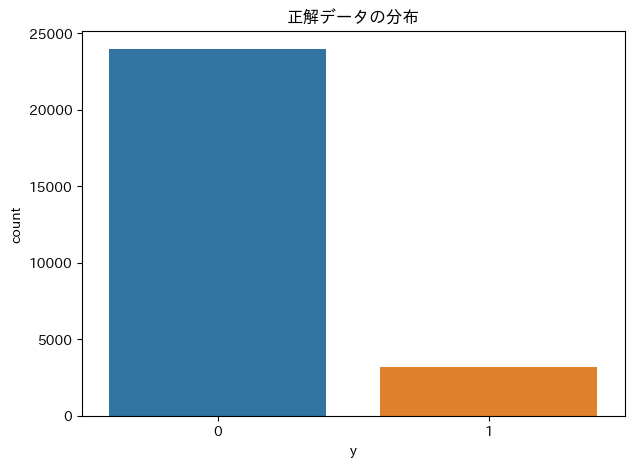

In [10]:
# MatplotlibのFigureを作成する。グラフのサイズを指定する。
plt.figure(figsize=(7,5))

# Seabornのcountplotを使って、train['y']の値の出現回数を数えて棒グラフで表示する。
sns.countplot(x=train['y'], data=train)

# グラフにタイトルを設定する。
plt.title('正解データの分布')

# グラフを表示する。
plt.show()

In [11]:
#カテゴリデータを見るためのdesribe
train.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,27128,27128,27128,27128,27128,27128,27128,27128,27128
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,5886,16411,13882,26644,15125,22788,17580,8317,22150


In [12]:
test.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,18083,18083,18083,18083,18083,18083,18083,18083,18083
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,3846,10803,9320,17752,10005,15179,11705,5449,14809


In [13]:
train_drop = train.copy()
train_drop = train_drop.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], axis=1)
train_drop.corr()

,id,age,balance,day,duration,campaign,pdays,previous,y
id,1.000000,-0.005716,-0.000484,0.002974,0.002705,0.016867,-0.004526,-0.005425,-0.003555
age,-0.005716,1.000000,0.095343,-0.008518,-0.005309,-0.001340,-0.025272,0.002946,0.020892
balance,-0.000484,0.095343,1.000000,0.002067,0.019923,-0.016295,0.003613,0.012483,0.045826
day,0.002974,-0.008518,0.002067,1.000000,-0.032453,0.164880,-0.096889,-0.050009,-0.031058
duration,0.002705,-0.005309,0.019923,-0.032453,1.000000,-0.087771,0.002030,0.002489,0.401390
campaign,0.016867,-0.001340,-0.016295,0.164880,-0.087771,1.000000,-0.086220,-0.031557,-0.076118
pdays,-0.004526,-0.025272,0.003613,-0.096889,0.002030,-0.086220,1.000000,0.421606,0.100930
previous,-0.005425,0.002946,0.012483,-0.050009,0.002489,-0.031557,0.421606,1.000000,0.083825
y,-0.003555,0.020892,0.045826,-0.031058,0.401390,-0.076118,0.100930,0.083825,1.000000


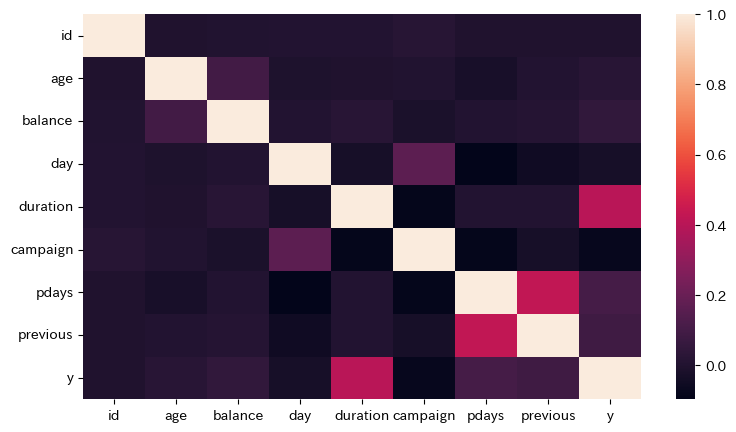

In [14]:
# ヒートマップで可視化
plt.figure(figsize=(9, 5))
sns.heatmap(train_drop.corr())
plt.xticks(rotation=0)
plt.show()

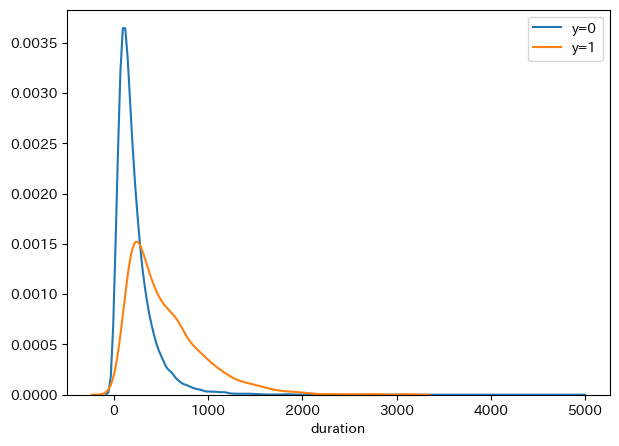

In [15]:
#kdeplotで確率密度関数可視化
plt.figure(figsize=(7,5))
sns.kdeplot(train_drop[train_drop['y']==0]['duration'],label='y=0')
sns.kdeplot(train_drop[train_drop['y']==1]['duration'],label='y=1')
plt.legend()
plt.ylabel('')
plt.show()

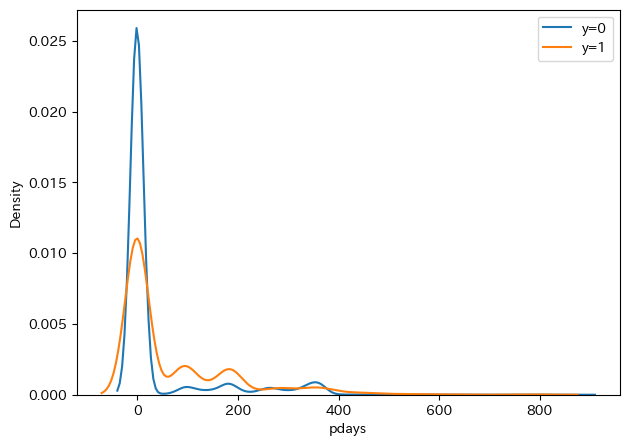

In [16]:
#kdeplotで確率密度関数可視化
plt.figure(figsize=(7,5))
sns.kdeplot(train_drop[train_drop['y']==0]['pdays'],label='y=0')
sns.kdeplot(train_drop[train_drop['y']==1]['pdays'],label='y=1')
plt.legend()
plt.show()

In [17]:
# 負の値があるように見えるので確認
train_drop['pdays'].value_counts()

pdays
-1      22146
 182       98
 92        89
 91        73
 183       72
        ...  
 437        1
 603        1
 779        1
 541        1
 421        1
Name: count, Length: 491, dtype: int64

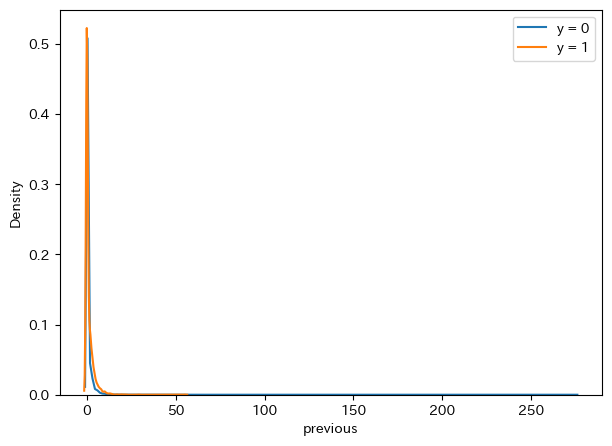

In [18]:
plt.figure(figsize=(7, 5))
sns.kdeplot(train_drop[train_drop['y'] == 0]['previous'], label='y = 0')
sns.kdeplot(train_drop[train_drop['y'] == 1]['previous'], label='y = 1')
plt.legend()
plt.show()

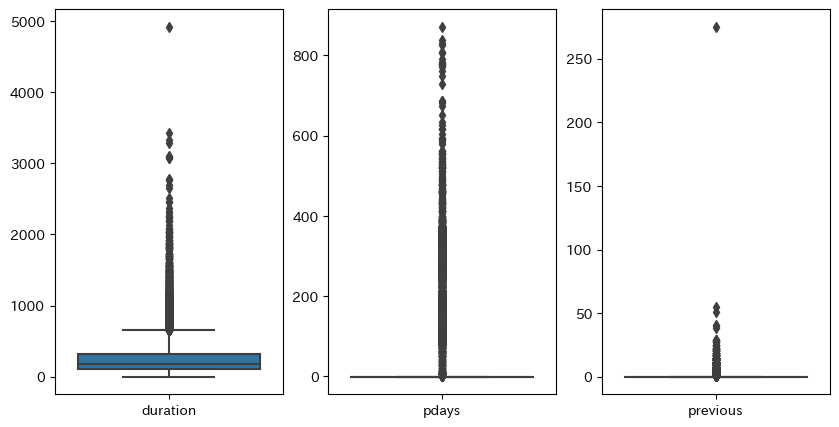

In [19]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.boxplot(train_drop[['duration']])

plt.subplot(1, 3, 2)
sns.boxplot(train_drop[['pdays']])

plt.subplot(1, 3, 3)
sns.boxplot(train_drop[['previous']])

plt.show()

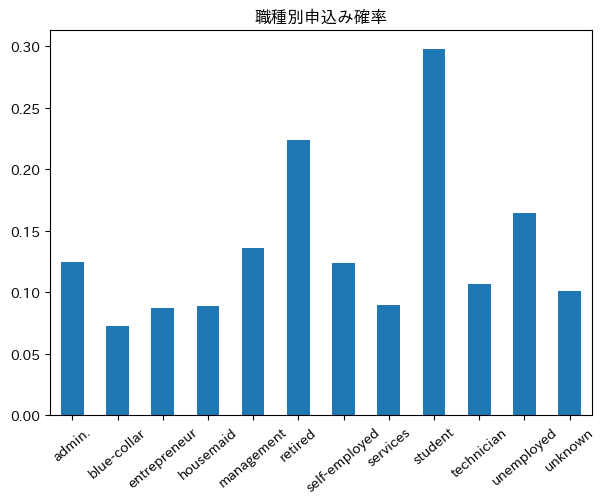

In [20]:
# 職種ごとのyの違い
plt.figure(figsize=(7, 5))
train.groupby('job')['y'].mean().plot.bar()
plt.xticks(rotation=40)
plt.title('職種別申込み確率')
plt.xlabel('')
plt.show()

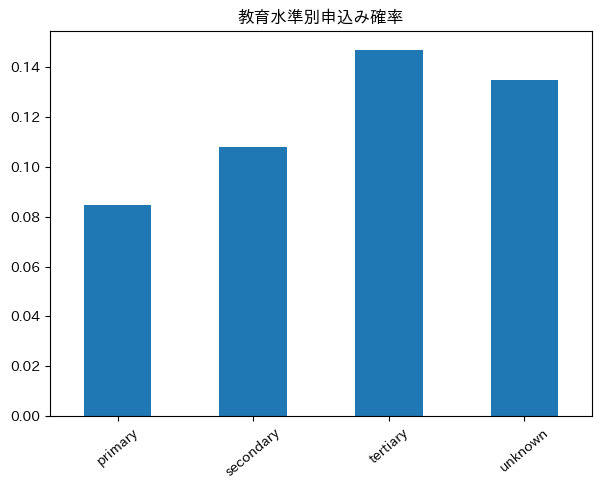

In [21]:
# educationごとのyの違い
plt.figure(figsize=(7, 5))
train.groupby('education')['y'].mean().plot.bar()
plt.xticks(rotation=40)
plt.title('教育水準別申込み確率')
plt.xlabel('')
plt.show()

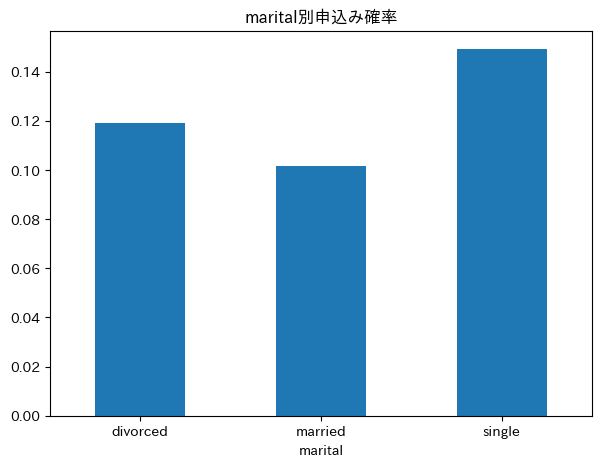

In [22]:
# 既婚かどうかによるyの違い
plt.figure(figsize=(7, 5))
train.groupby('marital')['y'].mean().plot.bar()
plt.title('marital別申込み確率')
plt.xticks(rotation=0)
plt.show()

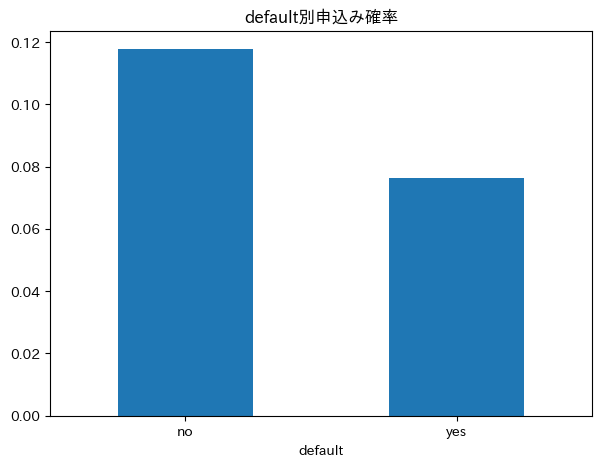

In [23]:
# 債務不履行があるかどうかによるyの違い
plt.figure(figsize=(7, 5))
train.groupby('default')['y'].mean().plot.bar()
plt.title('default別申込み確率')
plt.xticks(rotation=0)
plt.show()

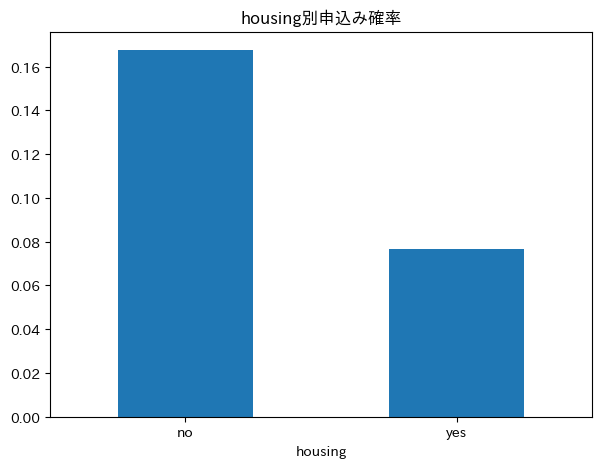

In [24]:
# 住宅ローンの有無によるyの違い
plt.figure(figsize=(7, 5))
train.groupby('housing')['y'].mean().plot.bar()
plt.title('housing別申込み確率')
plt.xticks(rotation=0)
plt.show()

In [25]:
use_columns = ['duration', 'pdays', 'previous', 'job', 'education', 'marital', 'default', 'housing', 'loan']
y = train['y']
train = train[use_columns]
test = test[use_columns]

In [26]:
train.head()

,duration,pdays,previous,job,education,marital,default,housing,loan
0,939,-1,0,blue-collar,secondary,married,no,yes,no
1,172,-1,0,entrepreneur,primary,married,no,no,no
2,567,595,2,management,tertiary,single,no,no,no
3,423,-1,0,retired,secondary,married,no,no,no
4,502,9,2,management,tertiary,single,no,no,no


In [27]:
# pdaysは-1とそれ以外で分ける
train.loc[train['pdays']>=0, 'pdays'] = 1 
train.loc[~train['pdays']>=0, 'pdays'] = 0

# previousは0とそれ以外で分ける
train.loc[train['previous']!=0, 'previous'] = 1

In [28]:
#カテゴリ変数のダミー変数化
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [29]:
display(train.head(), test.head())

,duration,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,marital_married,marital_single,default_yes,housing_yes,loan_yes
0,939,0,0,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
1,172,0,0,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,567,1,1,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,423,0,0,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
4,502,1,1,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False


,duration,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,marital_married,marital_single,default_yes,housing_yes,loan_yes
0,1294,-1,0,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,1029,-1,0,False,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,26,-1,0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,True
3,92,-1,0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
4,404,-1,0,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [30]:
print(train.shape)
print(test.shape)

(27128, 22)
(18083, 22)


In [31]:
ss = StandardScaler()
train_ss = pd.DataFrame(ss.fit_transform(train), columns=train.columns)
test_ss = pd.DataFrame(ss.transform(test), columns=test.columns)

In [32]:
# データの分割
X_train, X_valid, y_train, y_valid = train_test_split(train_ss, y, test_size=0.25, random_state=82, stratify=y)

In [33]:
from sklearn.ensemble import RandomForestClassifier

# class_weightを設定することで不均衡データに対応
rf = RandomForestClassifier(random_state=82, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=82)

In [34]:
# 学習
rf.fit(X_train, y_train)
rf.fit(X_valid, y_valid)

# 予測・精度算出
train_pred = rf.predict(X_train)
valid_pred = rf.predict(X_valid)
print('train score : ', accuracy_score(y_train, train_pred))
print('valid score : ', accuracy_score(y_valid, valid_pred))

train score :  0.8642485009338445
valid score :  0.9961663226186965


In [35]:
confusion_matrix(y_train, train_pred)

array([[16850,  1116],
       [ 1646,   734]], dtype=int64)

In [36]:
confusion_matrix(y_valid, valid_pred)

array([[5963,   25],
       [   1,  793]], dtype=int64)

In [37]:
lf_ = RandomForestClassifier(random_state=82)
lf_.fit(X_train, y_train)

# 学習
lf_.fit(X_train, y_train)
lf_.fit(X_valid, y_valid)

# 予測・精度算出
train_pred_ = lf_.predict(X_train)
valid_pred_ = lf_.predict(X_valid)
print('train score : ', accuracy_score(y_train, train_pred_))
print('valid score : ', accuracy_score(y_valid, valid_pred_))

train score :  0.8644942494839281
valid score :  0.9966086700088469


In [38]:
confusion_matrix(y_train, train_pred_)

array([[16832,  1134],
       [ 1623,   757]], dtype=int64)

In [39]:
confusion_matrix(y_valid, valid_pred_)


array([[5983,    5],
       [  18,  776]], dtype=int64)

In [40]:
train_proba = lf_.predict_proba(X_train)[:, 1]
valid_proba = lf_.predict_proba(X_valid)[:, 1]

In [41]:
#AUCスコアでの精度
print("train AUC:", roc_auc_score(y_train, train_pred_))
print("valid AUC:", roc_auc_score(y_valid, valid_pred_))

train AUC: 0.6274740008437975
valid AUC: 0.9882474857355348


In [42]:
from sklearn.metrics import roc_curve

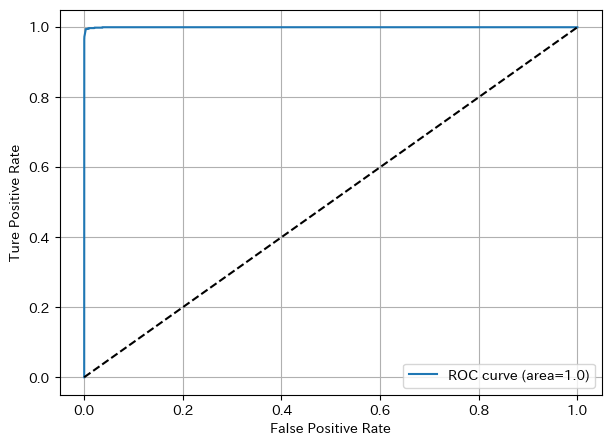

In [43]:
#AUCスコアの可視化
fpr, tpr, thresholds = roc_curve(y_valid, valid_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC curve (area={roc_auc_score(y_valid, valid_proba).round(2)})")
plt.plot([0, 1.0], [0,1.0], linestyle="--", color="black")
plt.xlabel('False Positive Rate')
plt.ylabel('Ture Positive Rate')
plt.legend()
plt.grid()
plt.show()

In [44]:
# testデータの予測
predict = lf_.predict_proba(test_ss)[:, 1]

NameError: name 'lr' is not defined

In [ ]:
# submit_sampleの読み込み、提出フォームの作成
submit = pd.read_csv('submit_sample.csv', header=None)
submit[1] = predict[:len(submit)]
submit.to_csv('submission_tutorial_rf.csv', header=None, index=False)

"""
# submit_sampleの読み込み、提出フォームの作成
submit = pd.read_csv('submit_sample.csv', header=None)
submit[1] = predict
submit.to_csv('submission_tutorial.csv', header=None,index=False)
"""

In [ ]:
submit.head()